<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/svm/SVM_GridSearch_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [102]:
data = pd.read_csv('titanic_train.csv')

In [103]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Information
- Embarked implies where the traveler mounted from. There are three possible values for Embark Southampton, Cherbourg, and Queenstown.
- SibSp is the number of siblings or spouse of a person onboard
- Parch is the feature contained the number of parents or children each passenger was touring with.

# Checking number of passenger died

In [104]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [105]:
data.drop(['PassengerId', 'Name', "Ticket", "Cabin"], axis=1, inplace=True)

In [106]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Replacing for NULL values
- "Age" with the mean value of "Age"
- Drop the samples of embarked with null values

In [107]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [108]:
data.fillna(value={'Age': data['Age'].mean()}, inplace=True)

In [109]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [110]:
data.dropna(inplace=True)

In [111]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# Creating Dummy Variables
- Dropping Female column, only male column can detect
- Dropping first column to avoid multicollinearity in embark

In [112]:
sex = pd.get_dummies(data['Sex'], drop_first=True,dtype=int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [113]:
embark = pd.get_dummies(data['Embarked'], drop_first=True,dtype=int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


# Adding Dummy Variables to original Data

In [114]:
data = pd.concat([data, sex, embark], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [115]:
data = data.drop(['Sex', 'Embarked'], axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Extract Features and Labels

In [116]:
X = data.drop(['Survived'], axis = 1).values
X.shape

(889, 8)

In [117]:
y = data['Survived'].values

# Performing train test Split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X_test.shape

(178, 8)

# Standardize the data

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying SVM

In [121]:
from sklearn.svm import SVC
svc = SVC()

In [122]:
svc = SVC(kernel = 'rbf',gamma='scale', C = 1)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
Accuracy = svc.score(X_test, y_test)
print(Accuracy)

0.8089887640449438


In [123]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

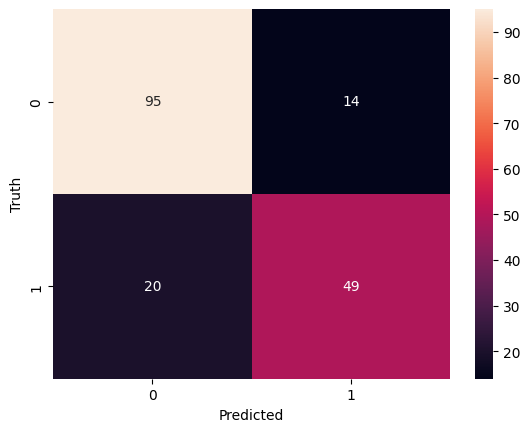

In [124]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Using Grid Search CV

In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle = True)
ksvc = SVC()
param_svc = {'C':[0.01, 0.1, 1,2,3], 'kernel':['linear', 'rbf'], 'gamma': [1, 0.1, 0.01, 0.001]}
ksvc_GSCV = GridSearchCV(ksvc, param_grid = param_svc, cv = cv)
ksvc_GSCV.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2, 3],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']})

In [126]:
ksvc_GSCV.best_params_

{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}

In [127]:
svc = SVC(kernel = 'rbf',gamma=0.1, C = 3)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
Accuracy = svc.score(X_test, y_test)
print(Accuracy)

0.8258426966292135


# Confusion Matrix

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

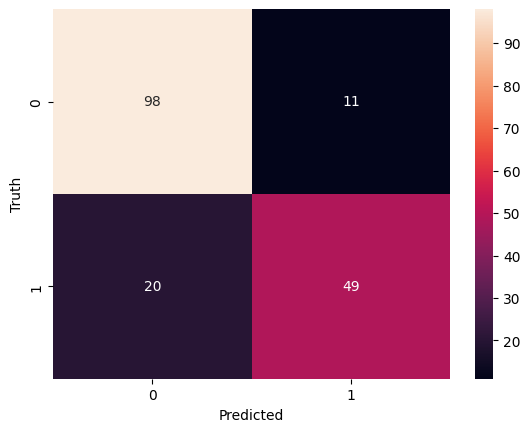

In [129]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()